## CPSC529: 05_Decision Tree

In [1]:
import pandas as pd
import scipy
import numpy
import os

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## Dataset 1: Vegetation data

### 1.1. Data Loading

In [2]:
#load data and extract data
df = pd.read_csv(os.path.join('data', 'vegetation.data'), sep=",")
df

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,high,chaparral
1,True,moderate,low,riparian
2,True,steep,medium,riparian
3,False,steep,medium,chaparral
4,False,flat,high,conifer
5,True,steep,highest,conifer
6,True,steep,high,chaparral


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STREAM      7 non-null      bool  
 1   SLOPE       7 non-null      object
 2   ELEVATION   7 non-null      object
 3   VEGETATION  7 non-null      object
dtypes: bool(1), object(3)
memory usage: 303.0+ bytes


In [4]:
from sklearn import preprocessing

# it is required that all feature/target values be numerical
# Systematically convert all string (labeled as object) type into labels(1,2,3,...)
label_encoding = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = label_encoding.fit_transform(df[column_name])
    else:
        pass

In [5]:
# # extract X, y
y = df.iloc[:, -1]   # all columns except the last column     
X = df.iloc[:, :-1]  # last column

### 1.1. Decision Tree With Gini Index

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='gini')
dt_clf.fit(X,y)

DecisionTreeClassifier()

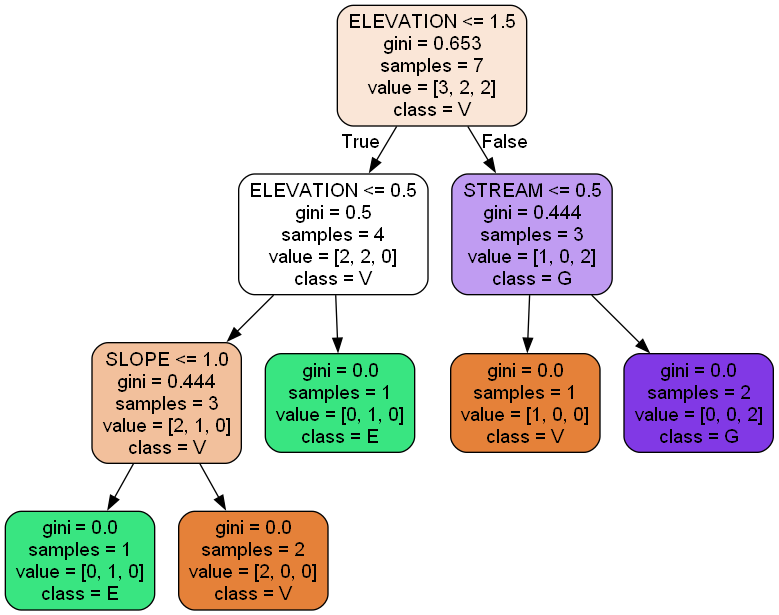

In [7]:
# option 1: use graphviz to visualize
## install graphviz
#!pip install graphviz
# For windows OS, you may also set the environment variable

from sklearn.tree import export_graphviz

export_graphviz(dt_clf, 
                out_file='vegetation_tree_gini.dot', 
                feature_names=df.columns[:-1],
                class_names=df.columns[-1],
                rounded=True,
                filled=True)

#import graphviz
! dot -Tpng vegetation_tree_gini.dot -o vegetation_tree_gini.png

from IPython.display import Image
Image("vegetation_tree_gini.png", width=300)

[Text(0.5555555555555556, 0.875, 'ELEVATION <= 1.5\ngini = 0.653\nsamples = 7\nvalue = [3, 2, 2]'),
 Text(0.3333333333333333, 0.625, 'ELEVATION <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0]'),
 Text(0.2222222222222222, 0.375, 'SLOPE <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7777777777777778, 0.625, 'STREAM <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

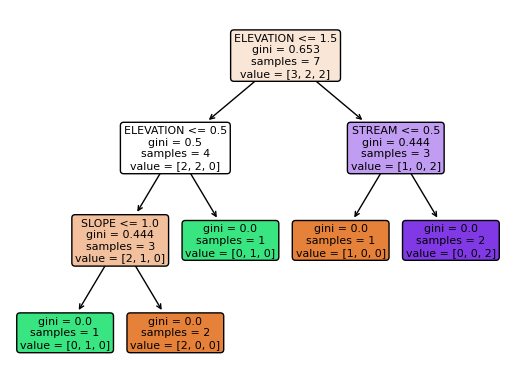

In [8]:
#option 2: use plot_tree from sklearn to visualize
from sklearn.tree import plot_tree

plot_tree(dt_clf, feature_names=df.columns[:-1], rounded=True,filled=True)

## Dataset 2: Iris

### 2.1. Data Loading

In [9]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names, target_name=iris.feature_names, iris.target_names
feature_names, target_name, X.shape, y.shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 (150, 4),
 (150,))

In [10]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

### 2.1. Decision Tree With Gini Index

In [11]:
dt_clf=DecisionTreeClassifier(criterion='gini', max_depth=2)
dt_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

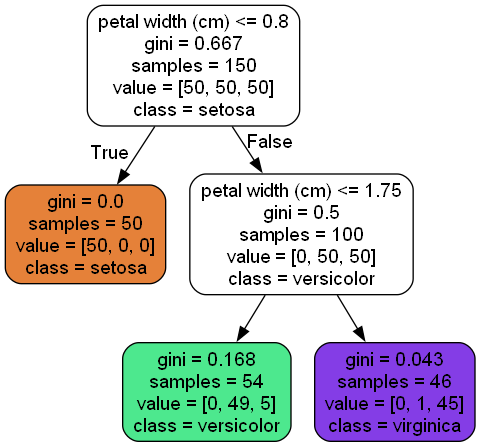

In [12]:
# option 1: graphviz

export_graphviz(dt_clf, 
                out_file='iris_tree_gini.dot', 
                feature_names=feature_names,
                class_names=target_name,
                rounded=True,
                filled=True)

! dot -Tpng  iris_tree_gini.dot -o iris_tree_gini.png

from IPython.display import Image
Image("iris_tree_gini.png", width=300)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

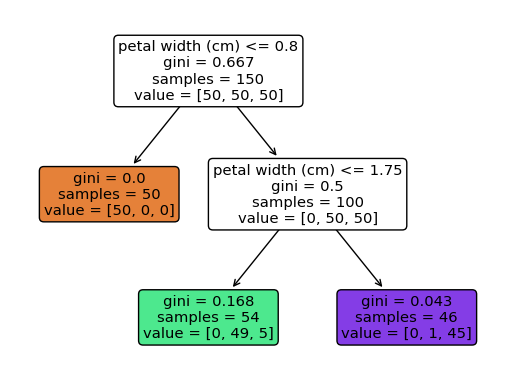

In [13]:
#option 2: use plot_tree from sklearn to visualize
from sklearn.tree import plot_tree

plot_tree(dt_clf, feature_names=feature_names, rounded=True,filled=True)

### 2.2. Decision Tree With Entropy

In [14]:
dt_clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_clf_entropy.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

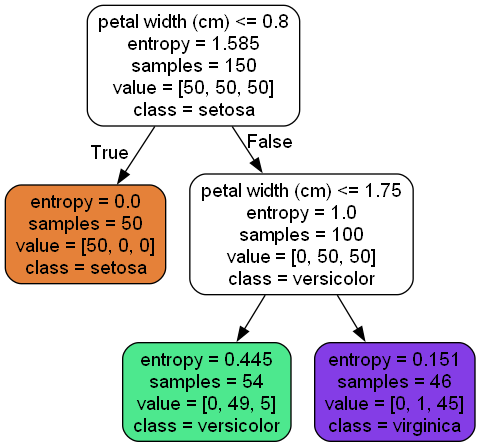

In [15]:
# option 1: graphviz
export_graphviz(dt_clf_entropy, 
                out_file='iris_tree_entropy.dot', 
                feature_names=feature_names,
                class_names=target_name,
                rounded=True,
                filled=True)

! dot -Tpng  iris_tree_entropy.dot -o iris_tree_entropy.png

from IPython.display import Image
Image("iris_tree_entropy.png", width=300)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

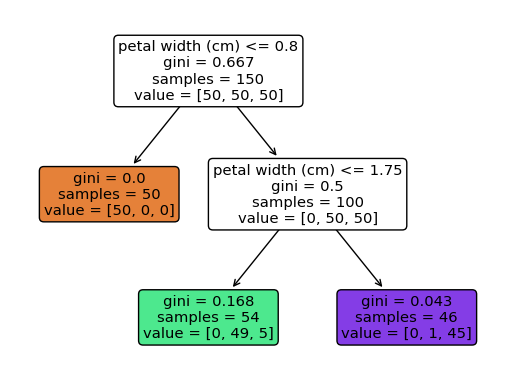

In [16]:
#option 2: use plot_tree from sklearn to visualize
from sklearn.tree import plot_tree

plot_tree(dt_clf, feature_names=feature_names, rounded=True,filled=True)

### 2.2. Decision Tree Prediction Probabilities

In [17]:
print(feature_names)
print(dt_clf_entropy.classes_, dt_clf_entropy.classes_,)
print ("Prediction label: ", dt_clf_entropy.predict([[5, 3.9, 5.5, 1.4]]))
print ("Prediction probability: ",dt_clf_entropy.predict_proba([[5, 3.9, 5.5, 1.4]]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2] [0 1 2]
Prediction label:  [1]
Prediction probability:  [[0.         0.90740741 0.09259259]]


## 3. Regression Example

DecisionTreeRegressor(max_depth=2)

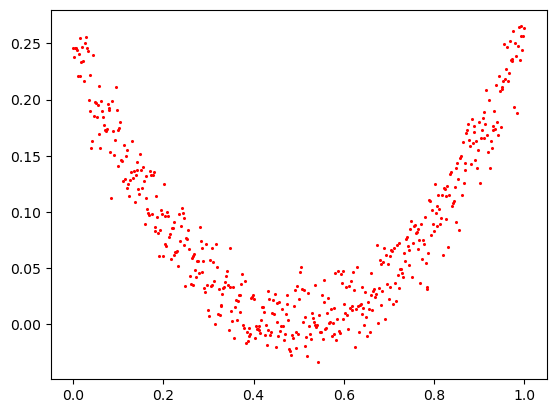

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# First we want to generate a noisy quadratic dataset
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.
plt.scatter(X, y, s=1.5, c='red')

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X[..., None], y[..., None])

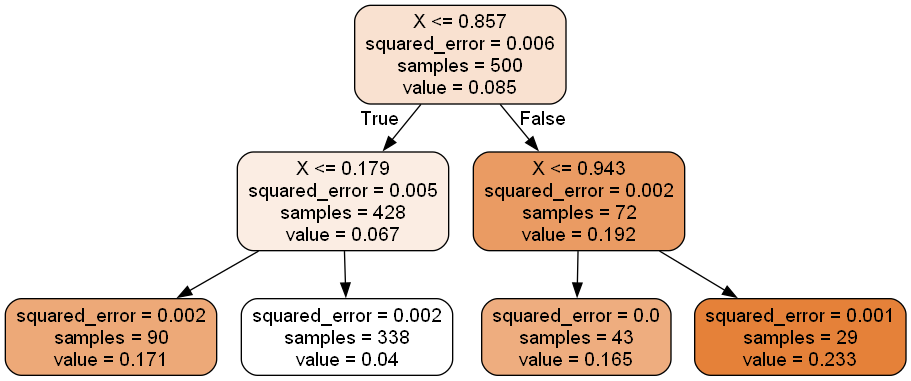

In [19]:
export_graphviz(tree_reg, 
                out_file='reg_tree.dot', 
                feature_names=['X'],
                class_names=['y'],
                rounded=True,
                filled=True)
! dot -Tpng reg_tree.dot -o reg_tree.png

from IPython.display import Image
Image("reg_tree.png", width=600)

[Text(0.5, 0.8333333333333334, 'X <= 0.857\nsquared_error = 0.006\nsamples = 500\nvalue = 0.085'),
 Text(0.25, 0.5, 'X <= 0.179\nsquared_error = 0.005\nsamples = 428\nvalue = 0.067'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.002\nsamples = 90\nvalue = 0.171'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.002\nsamples = 338\nvalue = 0.04'),
 Text(0.75, 0.5, 'X <= 0.943\nsquared_error = 0.002\nsamples = 72\nvalue = 0.192'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 43\nvalue = 0.165'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 29\nvalue = 0.233')]

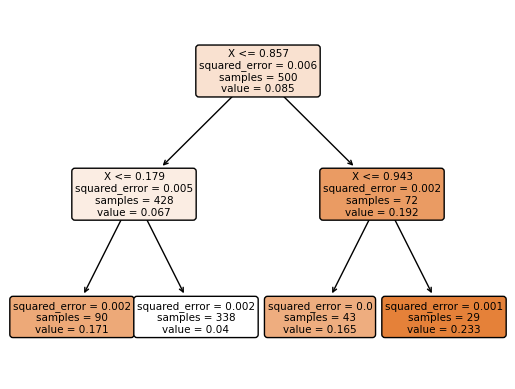

In [20]:
#option 2: use plot_tree from sklearn to visualize
from sklearn.tree import plot_tree

plot_tree(tree_reg, feature_names=['X'], rounded=True,filled=True)